In [188]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 

In [189]:
import warnings
warnings.filterwarnings('ignore')

In [190]:
df = pd.read_csv('customer_churn.csv')
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5657,3096-GKWEB,Male,0,Yes,No,18,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,94.75,1691.9,No
140,3146-MSEGF,Female,1,Yes,Yes,72,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),88.05,6425.65,No
4072,2688-BHGOG,Male,1,No,No,9,Yes,No,Fiber optic,No,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,79.55,718.55,No
3466,9430-NKQLY,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),25.10,1790.8,No
6285,2812-ENYMO,Male,0,No,No,26,No,No phone service,DSL,Yes,...,No,Yes,Yes,Yes,One year,No,Credit card (automatic),54.55,1362.85,No


In [191]:
df.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [192]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [193]:
df.TotalCharges.values
df.drop('customerID',axis='columns',inplace=True)


In [194]:
pd.to_numeric(df.TotalCharges, errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [195]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [196]:
df.shape

(7043, 20)

In [197]:
df.iloc[488].TotalCharges

' '

In [198]:
df1 = df[df.TotalCharges!=' ']
df1.shape

(7032, 20)

In [199]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [200]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

In [201]:
df1.TotalCharges.values

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

In [202]:
df1[df1.Churn=='No']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,Female,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


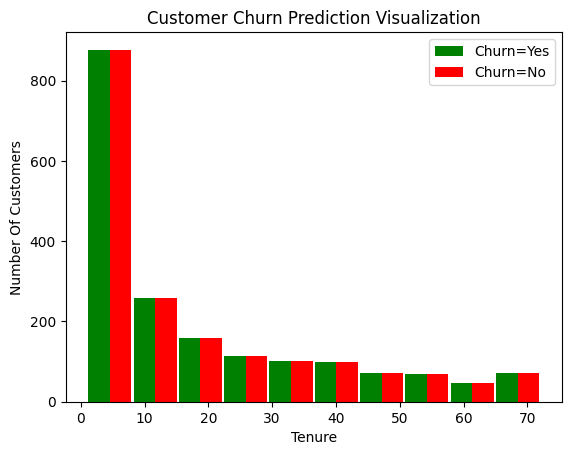

In [203]:
tenure_churn_no = df1[df1.Churn=='No'].tenure
tenure_churn_yes = df1[df1.Churn=='Yes'].tenure

plt.xlabel('Tenure')
plt.ylabel('Number Of Customers')
plt.title('Customer Churn Prediction Visualization')

plt.hist([tenure_churn_yes, tenure_churn_yes], rwidth=0.95, color=['green', 'red'], label=['Churn=Yes', 'Churn=No'])
plt.legend()

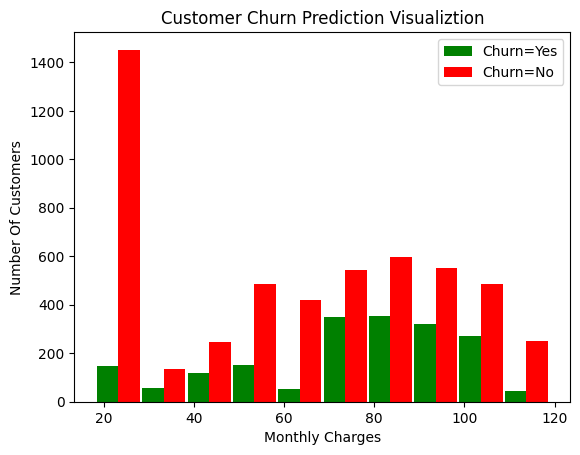

In [204]:
mc_churn_no = df1[df1.Churn=='No'].MonthlyCharges      
mc_churn_yes = df1[df1.Churn=='Yes'].MonthlyCharges      

plt.xlabel("Monthly Charges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

blood_sugar_men = [113, 85, 90, 150, 149, 88, 93, 115, 135, 80, 77, 82, 129]
blood_sugar_women = [67, 98, 89, 120, 133, 150, 84, 69, 89, 79, 120, 112, 100]

plt.hist([mc_churn_yes, mc_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

In [205]:
def print_unique_col_values(df):
    for column in df:
        if df[column].dtypes=='object':
            print(f'{column}: {df[column].unique()}')

In [206]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [207]:
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)

In [208]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [209]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    df1[col].replace({'Yes': 1,'No': 0},inplace=True)

In [210]:
for col in df1:
    print(f'{col}: {df1[col].unique()}') 

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [211]:
df1['gender'].replace({'Female':1,'Male':0},inplace=True)

In [212]:
df1.gender.unique()

array([1, 0], dtype=int64)

In [213]:
df2 = pd.get_dummies(data=df1, columns=['InternetService','Contract','PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [214]:
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2443,1,0,1,1,72,1,1,1,1,1,...,0,1,0,0,0,1,0,1,0,0
1004,0,0,0,0,21,1,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4215,0,0,1,0,72,1,1,0,1,1,...,0,1,0,0,0,1,0,0,1,0
144,0,1,1,0,71,1,1,0,0,0,...,0,0,1,0,0,1,1,0,0,0
3836,1,0,1,0,64,1,1,0,0,1,...,1,0,0,0,1,0,1,0,0,0


In [215]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [216]:
cols_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [217]:
for col in df2:
    print(f'{col}: {df2[col].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [

In [218]:
X = df2.drop('Churn', axis='columns')
y = df2.Churn

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [219]:
y_train.value_counts()

0    4130
1    1495
Name: Churn, dtype: int64

In [220]:
y.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [221]:
y_test.value_counts()

0    1033
1     374
Name: Churn, dtype: int64

In [222]:
X_train.shape, y_train.shape

((5625, 26), (5625,))

In [223]:
X_test.shape

(1407, 26)

In [224]:
X_train[:10]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
684,1,0,0,0,0.000000,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
2446,1,0,0,0,0.239437,1,1,0,1,0,...,0,1,0,1,0,0,0,1,0,0
1680,0,0,1,1,0.774648,1,1,0,0,0,...,0,0,1,0,1,0,0,0,0,1
2220,0,0,1,0,1.000000,1,0,1,1,0,...,1,0,0,0,0,1,1,0,0,0
2842,1,0,0,0,0.042254,0,0,1,0,1,...,1,0,0,1,0,0,0,0,0,1
5131,1,0,1,0,0.605634,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
4372,0,0,1,1,0.000000,1,0,0,0,0,...,0,0,1,1,0,0,1,0,0,0
4687,0,0,1,0,0.295775,1,0,0,0,1,...,0,1,0,1,0,0,0,1,0,0
2385,1,0,0,1,0.028169,0,0,0,1,0,...,1,0,0,1,0,0,0,0,0,1
6773,0,1,1,0,0.507042,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [225]:
len(X_train.columns)

26

In [226]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix, classification_report

In [236]:
def ANN(X_train, y_train, X_test, y_test, loss, weights):

    print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

    model = keras.Sequential([
        keras.layers.Dense(26, input_dim=26, activation='relu'),
        keras.layers.Dense(15, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])

    if weights == -1:
        model.fit(X_train, y_train, epochs=100)
    else:
        model.fit(X_train, y_train, epoch=100, class_weight = weights)

    print(model.evaluate(X_test, y_test))

    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)

    print("Classification Report \n", classification_report(y_test, y_preds))

    return y_preds

In [237]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

(2990, 26) (2990,) (748, 26) (748,)
Epoch 1/100
94/94 [==============================] - 1s 1ms/step - loss: 0.6146 - accuracy: 0.6863
Epoch 2/100
94/94 [==============================] - 0s 1ms/step - loss: 0.5220 - accuracy: 0.7498
Epoch 3/100
94/94 [==============================] - 0s 963us/step - loss: 0.4949 - accuracy: 0.7659
Epoch 4/100
94/94 [==============================] - 0s 959us/step - loss: 0.4902 - accuracy: 0.7632
Epoch 5/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4859 - accuracy: 0.7669
Epoch 6/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4823 - accuracy: 0.7692
Epoch 7/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4807 - accuracy: 0.7712
Epoch 8/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4773 - accuracy: 0.7702
Epoch 9/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4763 - accuracy: 0.7689
Epoch 10/100
94/94 [==============================] - 0s 1ms/step - l

Undersampling

In [238]:
count_class_0, count_class_1 = df1.Churn.value_counts()

df_class_0 = df2[df2['Churn'] == 0]
df_class_1 = df2[df2['Churn'] == 1]

In [239]:
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random Under-sampling:')
print(df_test_under.Churn.value_counts())


Random Under-sampling:
0    1869
1    1869
Name: Churn, dtype: int64


In [240]:
X = df_test_under.drop('Churn',axis='columns')
y = df_test_under['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [241]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

(2990, 26) (2990,) (748, 26) (748,)
Epoch 1/100
94/94 [==============================] - 1s 949us/step - loss: 0.6277 - accuracy: 0.6378
Epoch 2/100
94/94 [==============================] - 0s 933us/step - loss: 0.5076 - accuracy: 0.7569
Epoch 3/100
94/94 [==============================] - 0s 1000us/step - loss: 0.4967 - accuracy: 0.7649
Epoch 4/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4919 - accuracy: 0.7679
Epoch 5/100
94/94 [==============================] - 0s 970us/step - loss: 0.4875 - accuracy: 0.7702
Epoch 6/100
94/94 [==============================] - 0s 949us/step - loss: 0.4836 - accuracy: 0.7739
Epoch 7/100
94/94 [==============================] - 0s 981us/step - loss: 0.4815 - accuracy: 0.7686
Epoch 8/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4821 - accuracy: 0.7686
Epoch 9/100
94/94 [==============================] - 0s 957us/step - loss: 0.4768 - accuracy: 0.7732
Epoch 10/100
94/94 [==============================] - 0s 1

In [242]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

In [243]:
print("Random over-sampling:")
print(df_test_over.Churn.value_counts())

Random over-sampling:
0    5163
1    5163
Name: Churn, dtype: int64


In [244]:
X = df_test_over.drop('Churn',axis='columns')
y = df_test_over['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [245]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

(8260, 26) (8260,) (2066, 26) (2066,)
Epoch 1/100
259/259 [==============================] - 1s 1ms/step - loss: 0.5503 - accuracy: 0.7243
Epoch 2/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4894 - accuracy: 0.7622
Epoch 3/100
259/259 [==============================] - 0s 931us/step - loss: 0.4817 - accuracy: 0.7677
Epoch 4/100
259/259 [==============================] - 0s 954us/step - loss: 0.4776 - accuracy: 0.7697
Epoch 5/100
259/259 [==============================] - 0s 898us/step - loss: 0.4750 - accuracy: 0.7719
Epoch 6/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4723 - accuracy: 0.7737
Epoch 7/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4701 - accuracy: 0.7766
Epoch 8/100
259/259 [==============================] - 0s 910us/step - loss: 0.4679 - accuracy: 0.7751
Epoch 9/100
259/259 [==============================] - 0s 941us/step - loss: 0.4638 - accuracy: 0.7798
Epoch 10/100
259/259 [=====================

SMOTE

In [246]:
X = df2.drop('Churn', axis='columns')
y = df2['Churn']

In [249]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)
y_sm.value_counts()

0    5163
1    5163
Name: Churn, dtype: int64

In [250]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

In [251]:
y_train.value_counts()

1    4130
0    4130
Name: Churn, dtype: int64

In [252]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

(8260, 26) (8260,) (2066, 26) (2066,)
Epoch 1/100
259/259 [==============================] - 1s 1ms/step - loss: 0.5365 - accuracy: 0.7377
Epoch 2/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4743 - accuracy: 0.7714
Epoch 3/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4666 - accuracy: 0.7803
Epoch 4/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4600 - accuracy: 0.7808
Epoch 5/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4542 - accuracy: 0.7829
Epoch 6/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4499 - accuracy: 0.7877
Epoch 7/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4460 - accuracy: 0.7901
Epoch 8/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4435 - accuracy: 0.7914
Epoch 9/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4387 - accuracy: 0.7946
Epoch 10/100
259/259 [==============================]

Ensemble With Undersampling

In [253]:
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

In [254]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [255]:
df3 = X_train.copy()
df3['Churn'] = y_train

In [256]:
df3.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
684,1,0,0,0,0.000000,1,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0
2446,1,0,0,0,0.239437,1,1,0,1,0,...,1,0,1,0,0,0,1,0,0,1
1680,0,0,1,1,0.774648,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
2220,0,0,1,0,1.000000,1,0,1,1,0,...,0,0,0,0,1,1,0,0,0,0
2842,1,0,0,0,0.042254,0,0,1,0,1,...,0,0,1,0,0,0,0,0,1,0


In [257]:
df3_class0 = df3[df3.Churn==0]
df3_class1 = df3[df3.Churn==1]

In [258]:
def get_train_batch(df_majority, df_minority, start, end):
    df_train = pd.concat([df_majority[start:end], df_minority], axis=0)

    X_train = df_train.drop('Churn', axis='columns')
    y_train = df_train.Churn
    return X_train, y_train  

In [259]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 0, 1495)

y_pred1 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

(2990, 26) (2990,) (1407, 26) (1407,)
Epoch 1/100
94/94 [==============================] - 1s 1ms/step - loss: 0.6184 - accuracy: 0.6632
Epoch 2/100
94/94 [==============================] - 0s 1ms/step - loss: 0.5206 - accuracy: 0.7615
Epoch 3/100
94/94 [==============================] - 0s 1ms/step - loss: 0.5024 - accuracy: 0.7632
Epoch 4/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4952 - accuracy: 0.7656
Epoch 5/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4911 - accuracy: 0.7645
Epoch 6/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4876 - accuracy: 0.7659
Epoch 7/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4849 - accuracy: 0.7686
Epoch 8/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4819 - accuracy: 0.7666
Epoch 9/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4801 - accuracy: 0.7712
Epoch 10/100
94/94 [==============================] - 0s 1ms/step - los

In [260]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 1495, 2990)

y_pred2 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

(2990, 26) (2990,) (1407, 26) (1407,)
Epoch 1/100
94/94 [==============================] - 1s 1ms/step - loss: 0.6485 - accuracy: 0.6050
Epoch 2/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5382 - accuracy: 0.7468
Epoch 3/100
94/94 [==============================] - 0s 3ms/step - loss: 0.5061 - accuracy: 0.7572
Epoch 4/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4980 - accuracy: 0.7612
Epoch 5/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4903 - accuracy: 0.7645
Epoch 6/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4868 - accuracy: 0.7649
Epoch 7/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4825 - accuracy: 0.7656
Epoch 8/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4787 - accuracy: 0.7709
Epoch 9/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4758 - accuracy: 0.7722
Epoch 10/100
94/94 [==============================] - 0s 2ms/step - los

In [261]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 2990, 4130)

y_pred3 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

(2635, 26) (2635,) (1407, 26) (1407,)
Epoch 1/100
83/83 [==============================] - 1s 1ms/step - loss: 0.5913 - accuracy: 0.7108
Epoch 2/100
83/83 [==============================] - 0s 2ms/step - loss: 0.5154 - accuracy: 0.7628
Epoch 3/100
83/83 [==============================] - 0s 1ms/step - loss: 0.4967 - accuracy: 0.7670
Epoch 4/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4863 - accuracy: 0.7715
Epoch 5/100
83/83 [==============================] - 0s 4ms/step - loss: 0.4807 - accuracy: 0.7734
Epoch 6/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4754 - accuracy: 0.7780
Epoch 7/100
83/83 [==============================] - 0s 3ms/step - loss: 0.4711 - accuracy: 0.7803
Epoch 8/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4701 - accuracy: 0.7806
Epoch 9/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4674 - accuracy: 0.7833
Epoch 10/100
83/83 [==============================] - 0s 2ms/step - los

In [262]:
y_pred_final = y_pred1.copy()
for i in range(len(y_pred1)):
    n_ones = y_pred1[i] + y_pred2[i] + y_pred3[i]
    if n_ones>1:
        y_pred_final[i] = 1
    else:
        y_pred_final[i] = 0

In [263]:
cl_rep = classification_report(y_test, y_pred_final)
print(cl_rep)

              precision    recall  f1-score   support

           0       0.90      0.67      0.77      1033
           1       0.47      0.80      0.59       374

    accuracy                           0.71      1407
   macro avg       0.69      0.74      0.68      1407
weighted avg       0.79      0.71      0.72      1407

